--2019-07-19 13:48:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2019-07-19 13:48:23 (1.65 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



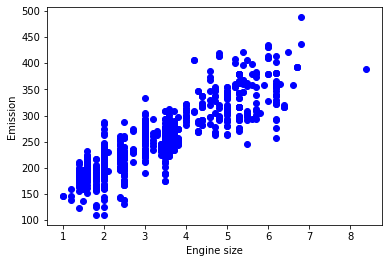

Coefficients:  [[39.10516492]]
Intercept:  [124.24881505]


Text(0, 0.5, 'Emission')

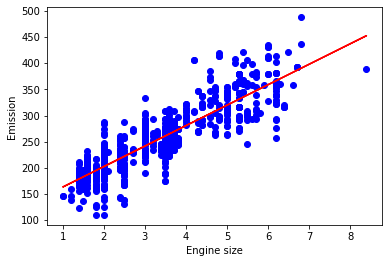

In [4]:
# use scikit-learn to implement simple linear regression
# download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 
# Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

# Importing Needed packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Downloading Data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

# Reading the data in
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

# summarize the data
df.describe()

# Lets select some features to explore more.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

# split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.
# create a mask to select random rows using np.random.rand() function:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Regression Model
# minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Modeling
# Using sklearn package to model data.

# simple linear regression, with only 2 parameters,
# and knowing that the parameters are the intercept and slope of the line

# sklearn can estimate them directly from our data.

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.

# Plot outputs
# Plot the fit line over the data:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")